# Solve for general case

In [56]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

mu, alpha = sp.symbols('mu alpha',real=True,positive=True)
r = sp.symbols('r_sigma',real=True,positive=True)
r2 = sp.symbols('r_\sigma\'',real=True,positive=True)
eta1 = sp.symbols('\eta_sigma',real=True,positive=True)
eta2 = sp.symbols('\eta_{\sigma\'}',real=True,positive=True) 
eta = sp.symbols('\eta',real=True,positive=True)

phi = sp.symbols('phi',real=True)

In [58]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r * (1-r**4)* ( r**2 * sp.cos(alpha) + 2 * mu*eta*r2*r*sp.cos(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.cos(alpha + 2*phi))


dpsi1 = -sp.Rational(1,2) *1/r**2 * (1+r**4)*( r**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = -sp.Rational(1,2) *1/r2**2 * (1+r2**4)*(eta**2 * r2**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha-phi) + mu **2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1

Dphi = sp.simplify(dphi.subs(r2,1))
Dr =  dr.subs(r2,1)

# Case $r = 1$

해봐야 하는 일
1. 일단 1

In [62]:
mu_coeff = Dphi.subs(r,1).expand().collect(mu,evaluate=False)
mu2 = mu_coeff[mu**2]
mu1 = mu_coeff[mu].trigsimp()/2
mu0 = mu_coeff[1].trigsimp()

In [66]:
sp.solve(Dphi.subs(r,1).expand(),mu)

[(-2*\eta*sin(phi)*cos(alpha) - sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi)),
 (-2*\eta*sin(phi)*cos(alpha) + sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))]

In [64]:
sp.trigsimp((-mu1 + sp.sqrt(mu1**2 - mu2*mu0))/mu2)

(-2*\eta*sin(phi)*cos(alpha) + sqrt(4*\eta**2*sin(phi)**2*cos(alpha)**2 + (\eta**2 - 1)*(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))*sin(alpha)))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))

In [13]:
print(sp.solve(Dphi.subs(r,1),mu)[0])


(-2*\eta*sin(phi)*cos(alpha) - sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))


In [ ]:
(-2*eta*np.sin(phi)*np.cos(alpha) - np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))

In [77]:
def get_r_1_mup(alpha,phi,eta = 100):
    mu2 = eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi)
    mu1 = 2*eta*np.sin(phi)*np.cos(alpha)
    mu0 = (1 - eta**2)*np.sin(alpha)
    mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
    return mu

In [47]:
def get_r_1_mum(alpha,phi,eta = 100):
    mu2 = eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi)
    mu1 = 2*eta*np.sin(phi)*np.cos(alpha)
    mu0 = (1 - eta**2)*np.sin(alpha)
    mu = (-mu1 - np.sqrt(mu1**2 - mu2*mu0))/mu2
    return mu

In [69]:
def get_r_1_mum(alpha,phi,eta = 100):
    return (-2*eta*np.sin(phi)*np.cos(alpha) + np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


(0.0, 1.5707963267948966)

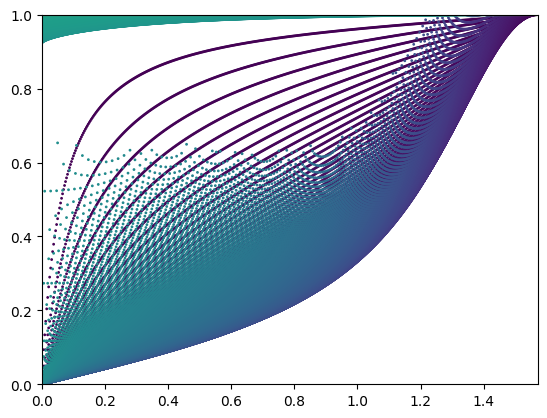

In [103]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PH = np.meshgrid(alpha,phi)

# plt.pcolormesh(AL,PH,get_r_1_mum(AL,PH,eta = 100),cmap='bwr')
MU = get_r_1_mup(AL,PH,eta =1.5)
plt.scatter(AL,MU,c=PH,s=1)
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


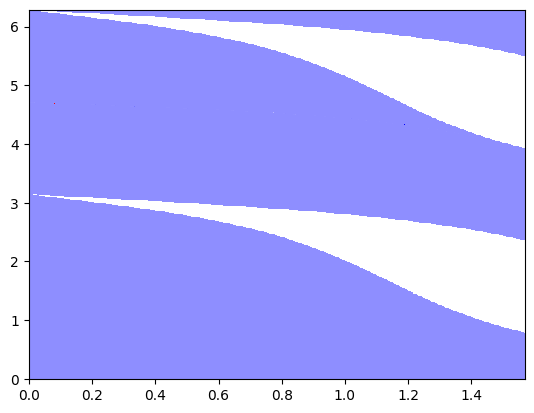

In [91]:
MU = get_r_1_mup(AL,PH,eta =1.5)
plt.pcolormesh(AL,PH,MU,cmap='bwr')


In [92]:
MU

array([[        nan,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.04922948,  0.09356861, ...,  0.99956536,
         0.99976302,  0.99996076],
       [ 0.        ,  0.02528351,  0.04923431, ...,  0.99944776,
         0.99984309,  1.00023872],
       ...,
       [-0.9233697 , -0.91929789, -0.91474817, ...,  1.00182444,
         1.00142751,  1.00103092],
       [-0.9231501 , -0.91455253, -0.90364069, ...,  1.00075251,
         1.00055445,  1.00035647],
       [-0.92307692,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


(0.0, 1.5707963267948966)

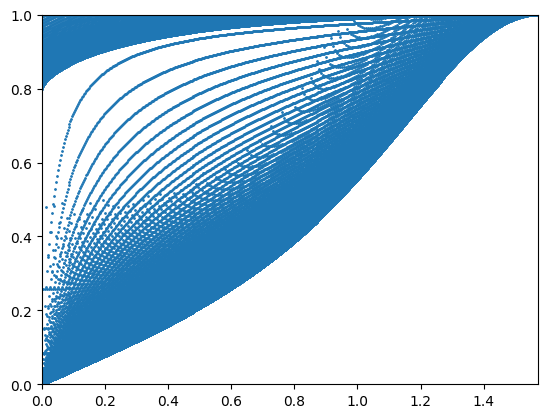

In [110]:
MU = get_r_1_mup(AL,PH,eta =2)

MU =np.where((0<=MU)&(MU<=1),MU,np.nan)
plt.scatter(AL,MU,s=1)
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

(0.0, 1.5707963267948966)

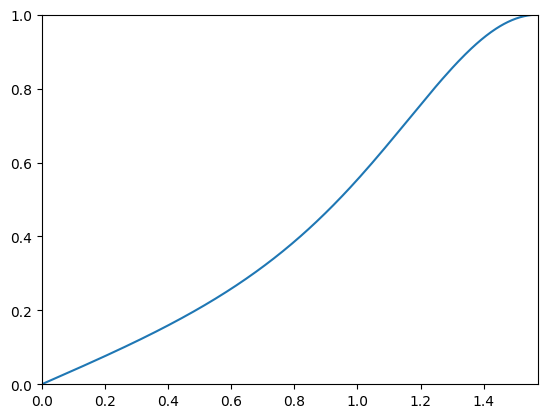

In [112]:
plt.plot(alpha,np.nanmin(MU,axis=0))
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

In [115]:
np.argmin(MU,axis=0)

array([  0, 301, 249, 249, 249, 248, 248, 247, 247, 247, 246, 246, 246,
       245, 245, 244, 244, 244, 243, 243, 243, 242, 242, 241, 241, 241,
       240, 240, 239, 239, 239, 238, 238, 238, 237, 237, 236, 236, 236,
       235, 235, 235, 234, 234, 233, 233, 233, 232, 232, 232, 231, 231,
       230, 230, 230, 229, 229, 228, 228, 228, 227, 227, 227, 226, 226,
       225, 225, 225, 224, 224, 223, 223, 223, 222, 222, 221, 221, 221,
       220, 220, 219, 219, 219, 218, 218, 217, 217, 217, 216, 216, 215,
       215, 215, 214, 214, 213, 213, 213, 212, 212, 211, 211, 211, 210,
       210, 209, 209, 209, 208, 208, 207, 207, 206, 206, 206, 205, 205,
       204, 204, 204, 203, 203, 202, 202, 201, 201, 201, 200, 200, 199,
       199, 198, 198, 198, 197, 197, 196, 196, 195, 195, 195, 194, 194,
       193, 193, 192, 192, 192, 191, 191, 190, 190, 189, 189, 188, 188,
       188, 187, 187, 186, 186, 185, 185, 185, 184, 184, 183, 183, 182,
       182, 181, 181, 180, 180, 180, 179, 179, 178, 178, 177, 17

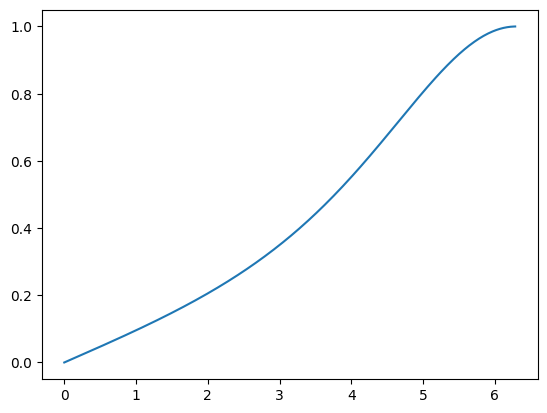

In [114]:
plt.plot(phi,np.nanmin(MU,axis=0))
# plt.ylim(0,1)
# plt.xlim(0,np.pi/2)

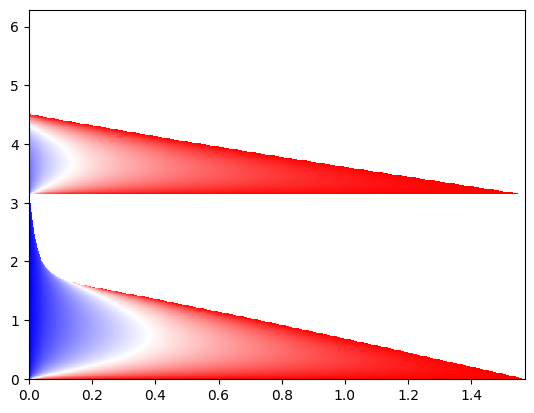

In [101]:
plt.pcolormesh(AL,PH,MU,cmap='bwr')